In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:\SoB\MainSoB.csv',sep=",",header=0, index_col=False)
df = df.drop(df.columns[0], axis=1)
Territories_To_Drop = [2, 11, 15, 72, 78]
Commodities_list=[41,11,81,51,88,91,21]
df = df[~df['State.Code'].isin(Territories_To_Drop)]
df = df[df['Commodity.Code'].isin(Commodities_list)]
df['Liability'] = pd.to_numeric(df['Liability'])
df=df[df['Liability']!=0]
#Drops rows with 0 liability... somehow
def add_leading_zero(column):
    max_length = df[column].astype(str).str.len().max()
    return df[column].astype(str).apply( lambda string: string.zfill(max_length) if len(string) < max_length else string)
df['FIPS']=add_leading_zero('State.Code')+add_leading_zero('County.Code')
df['ID']=df['Year'].astype(str)+'_'+df['FIPS']
main=df.copy()

In [2]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729610 entries, 13 to 3396780
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   State.Code                int64  
 2   State.Abbr                object 
 3   County.Code               int64  
 4   County.Name               object 
 5   Commodity.Code            int64  
 6   Commodity.Name            object 
 7   Insurance.Plan.Code       int64  
 8   Insurance.Plan.Abbr       object 
 9   Coverage.Category         object 
 10  Delivery.Type             object 
 11  Coverage.Level            float64
 12  Policies.Sold.Count       int64  
 13  Policies.Earning.Premium  int64  
 14  Policies.Indemnified      int64  
 15  Units.Earning.Premium     int64  
 16  Units.Indemnified         int64  
 17  Quantity.Type             object 
 18  Net.Planted.Quantity      float64
 19  Net.Endorsed.Acres        int64  
 20  Liability              

In [3]:
temp= main[['ID','Commodity.Code','Coverage.Level','Total.Premium','Indemnity.Amount','Net.Planted.Quantity','Liability']].copy()

# Filter the DataFrame for Coverage.Level = 0.5
coverage_0_5 = temp[temp['Coverage.Level'] == 0.5]
# Group by ID, Commodity.Code, and Coverage.Level = 0.5, and calculate the sums
grouped_0_5 = coverage_0_5.groupby(['ID', 'Commodity.Code', 'Coverage.Level']).sum().reset_index()
# Filter the DataFrame for Coverage.Level != 0.5
coverage_other = temp[temp['Coverage.Level'] != 0.5]
# Group by ID, Commodity.Code, and Coverage.Level != 0.5, and calculate the sums
grouped_other = coverage_other.groupby(['ID', 'Commodity.Code']).sum().reset_index()
# Concatenate the two grouped DataFrames
result = pd.concat([grouped_0_5, grouped_other])

result['Loss.Ratio'] = result['Indemnity.Amount']/result['Total.Premium']
result['Coverage.Level'] = result['Coverage.Level'].astype(str)
result['Coverage.Level'] = np.where(result['Coverage.Level'] == '0.5', 'CAT', 'BUY')
#Calculate Loss Ratio and Label Results

result['Ln_LR']=np.log(result['Loss.Ratio']+0.001)

result.head(30)

D:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ID,Commodity.Code,Coverage.Level,Total.Premium,Indemnity.Amount,Net.Planted.Quantity,Liability,Loss.Ratio,Ln_LR
0,1989_01001,41,CAT,14.0,0,6.0,281.0,0.000000,-6.907755
1,1989_01003,41,CAT,719.0,0,123.0,7939.0,0.000000,-6.907755
2,1989_01005,21,CAT,846.0,8507,102.0,11751.0,10.055556,2.308225
3,1989_01005,41,CAT,70.0,0,27.0,791.0,0.000000,-6.907755
4,1989_01031,41,CAT,228.0,0,121.0,2576.0,0.000000,-6.907755
5,1989_01033,21,CAT,16336.0,15277,1718.0,258543.0,0.935174,-0.065954
6,1989_01033,41,CAT,430.0,0,187.0,5752.0,0.000000,-6.907755
7,1989_01033,81,CAT,3665.0,0,796.0,31002.0,0.000000,-6.907755
8,1989_01039,21,CAT,2413.0,0,203.0,30508.0,0.000000,-6.907755
9,1989_01039,41,CAT,164.0,0,40.0,1924.0,0.000000,-6.907755


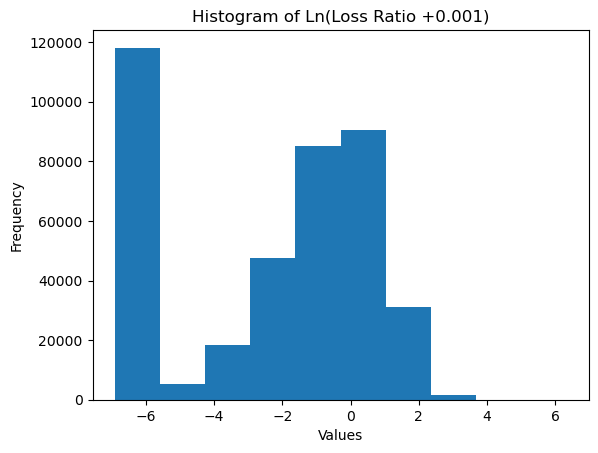

In [4]:
plt.hist(result['Ln_LR'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Ln(Loss Ratio +0.001)')
plt.show()

In [5]:
#Lasso for >0, close to normal ish without load at 0
#KNN or Log for =0

In [6]:
filt_result= result[result['Loss.Ratio']>0]

In [7]:
filt_result.loc[:,'Ln_LR']=np.log(filt_result['Loss.Ratio'])

C:\Users\siegl\AppData\Local\Temp\ipykernel_21056\3690486982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_result.loc[:,'Ln_LR']=np.log(filt_result['Loss.Ratio'])


In [8]:
filt_result.head(30)

,ID,Commodity.Code,Coverage.Level,Total.Premium,Indemnity.Amount,Net.Planted.Quantity,Liability,Loss.Ratio,Ln_LR
2,1989_01005,21,CAT,846.0,8507,102.0,11751.0,10.055556,2.308125
5,1989_01033,21,CAT,16336.0,15277,1718.0,258543.0,0.935174,-0.067023
10,1989_01039,81,CAT,723.0,1031,107.0,4627.0,1.426003,0.354875
12,1989_01045,41,CAT,880.0,311,416.0,9047.0,0.353409,-1.040129
14,1989_01047,81,CAT,266.0,1423,39.0,1567.0,5.349624,1.677026
20,1989_01067,21,CAT,1649.0,6927,172.0,17747.0,4.200728,1.435258
22,1989_01069,81,CAT,209.0,1203,39.0,1203.0,5.755981,1.750239
23,1989_01077,21,CAT,10546.0,9922,1731.0,191308.0,0.940831,-0.060992
24,1989_01077,41,CAT,3872.0,102,1350.0,47284.0,0.026343,-3.636554
25,1989_01077,81,CAT,2532.0,1260,625.0,26839.0,0.497630,-0.697898


In [9]:
#Creates new dataframe, where each row for an ID has the Loss Ratio for each Coverage X Commodity
wide = result.pivot_table( index=['ID'],columns=['Commodity.Code','Coverage.Level'], values=['Loss.Ratio'])

#wide = wide.reset_index().copy()
wide.head()

Loss.Ratio                                                  \
Commodity.Code         11            21                   41       51       
Coverage.Level        BUY CAT       BUY        CAT       BUY  CAT BUY CAT   
ID                                                                          
1989_01001            NaN NaN  1.122985        NaN  0.000000  0.0 NaN NaN   
1989_01003       5.961480 NaN  0.316592        NaN  0.114442  0.0 NaN NaN   
1989_01005            NaN NaN  1.917953  10.055556  1.622552  0.0 NaN NaN   
1989_01031       3.704942 NaN  4.096840        NaN  0.000000  0.0 NaN NaN   
1989_01033            NaN NaN  1.952855   0.935174  0.000000  0.0 NaN NaN   

                                           
Commodity.Code        81       88  91      
Coverage.Level       BUY  CAT BUY BUY CAT  
ID                                         
1989_01001           NaN  NaN NaN NaN NaN  
1989_01003      1.050901  NaN NaN NaN NaN  
1989_01005           NaN  NaN NaN NaN NaN  
1989_01031      2.603691  NaN NaN NaN NaN  
1989_01033      1.416871  0.0 NaN NaN NaN

In [10]:
temp = wide.reset_index().copy()
missing= temp.copy()
missing.iloc[:,1:] = pd.isna(missing.iloc[:,1:]).astype(int)
#missing['ID'] = new_df['Category'].fillna(0)
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (ID, , )               64593 non-null  object
 1   (Loss.Ratio, 11, BUY)  64593 non-null  int32 
 2   (Loss.Ratio, 11, CAT)  64593 non-null  int32 
 3   (Loss.Ratio, 21, BUY)  64593 non-null  int32 
 4   (Loss.Ratio, 21, CAT)  64593 non-null  int32 
 5   (Loss.Ratio, 41, BUY)  64593 non-null  int32 
 6   (Loss.Ratio, 41, CAT)  64593 non-null  int32 
 7   (Loss.Ratio, 51, BUY)  64593 non-null  int32 
 8   (Loss.Ratio, 51, CAT)  64593 non-null  int32 
 9   (Loss.Ratio, 81, BUY)  64593 non-null  int32 
 10  (Loss.Ratio, 81, CAT)  64593 non-null  int32 
 11  (Loss.Ratio, 88, BUY)  64593 non-null  int32 
 12  (Loss.Ratio, 91, BUY)  64593 non-null  int32 
 13  (Loss.Ratio, 91, CAT)  64593 non-null  int32 
dtypes: int32(13), object(1)
memory usage: 3.7+ MB


C:\Users\siegl\AppData\Local\Temp\ipykernel_21056\3111729491.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  missing.iloc[:,1:] = pd.isna(missing.iloc[:,1:]).astype(int)


In [11]:
missing['ID']=missing['ID'].astype(str)
missing['State']=missing['ID'].str[5:7]
missing['State']

0        01
1        01
2        01
3        01
4        01
         ..
64588    56
64589    56
64590    56
64591    56
64592    56
Name: State, Length: 64593, dtype: object

In [12]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (ID, , )               64593 non-null  object
 1   (Loss.Ratio, 11, BUY)  64593 non-null  int32 
 2   (Loss.Ratio, 11, CAT)  64593 non-null  int32 
 3   (Loss.Ratio, 21, BUY)  64593 non-null  int32 
 4   (Loss.Ratio, 21, CAT)  64593 non-null  int32 
 5   (Loss.Ratio, 41, BUY)  64593 non-null  int32 
 6   (Loss.Ratio, 41, CAT)  64593 non-null  int32 
 7   (Loss.Ratio, 51, BUY)  64593 non-null  int32 
 8   (Loss.Ratio, 51, CAT)  64593 non-null  int32 
 9   (Loss.Ratio, 81, BUY)  64593 non-null  int32 
 10  (Loss.Ratio, 81, CAT)  64593 non-null  int32 
 11  (Loss.Ratio, 88, BUY)  64593 non-null  int32 
 12  (Loss.Ratio, 91, BUY)  64593 non-null  int32 
 13  (Loss.Ratio, 91, CAT)  64593 non-null  int32 
 14  (State, , )            64593 non-null  object
dtypes: int32(13), objec

In [13]:
# One-hot encode the categorical variable
encoded_df = pd.get_dummies(missing['State'], drop_first=True)

# Concatenate the encoded dataframe with the original dataframe
missing_state = pd.concat([missing, encoded_df], axis=1)
missing_state.info()
df = missing_state.drop(missing_state.columns[0], axis=1)
df.info()
resul2 = df.drop(df.columns[13], axis=1)
resul2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (ID, , )               64593 non-null  object
 1   (Loss.Ratio, 11, BUY)  64593 non-null  int32 
 2   (Loss.Ratio, 11, CAT)  64593 non-null  int32 
 3   (Loss.Ratio, 21, BUY)  64593 non-null  int32 
 4   (Loss.Ratio, 21, CAT)  64593 non-null  int32 
 5   (Loss.Ratio, 41, BUY)  64593 non-null  int32 
 6   (Loss.Ratio, 41, CAT)  64593 non-null  int32 
 7   (Loss.Ratio, 51, BUY)  64593 non-null  int32 
 8   (Loss.Ratio, 51, CAT)  64593 non-null  int32 
 9   (Loss.Ratio, 81, BUY)  64593 non-null  int32 
 10  (Loss.Ratio, 81, CAT)  64593 non-null  int32 
 11  (Loss.Ratio, 88, BUY)  64593 non-null  int32 
 12  (Loss.Ratio, 91, BUY)  64593 non-null  int32 
 13  (Loss.Ratio, 91, CAT)  64593 non-null  int32 
 14  (State, , )            64593 non-null  object
 15  04                 

In [14]:
missing_state = resul2
new_columns = [(col[0],col[1] ,col[2] + ' missing') if i < 13 else col for i, col in enumerate(missing_state.columns)]
missing_state.rename(columns=dict(zip(missing_state.columns, new_columns)), inplace=True)

In [15]:
missing_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   (Loss.Ratio, 11, BUY missing)  64593 non-null  int32
 1   (Loss.Ratio, 11, CAT missing)  64593 non-null  int32
 2   (Loss.Ratio, 21, BUY missing)  64593 non-null  int32
 3   (Loss.Ratio, 21, CAT missing)  64593 non-null  int32
 4   (Loss.Ratio, 41, BUY missing)  64593 non-null  int32
 5   (Loss.Ratio, 41, CAT missing)  64593 non-null  int32
 6   (Loss.Ratio, 51, BUY missing)  64593 non-null  int32
 7   (Loss.Ratio, 51, CAT missing)  64593 non-null  int32
 8   (Loss.Ratio, 81, BUY missing)  64593 non-null  int32
 9   (Loss.Ratio, 81, CAT missing)  64593 non-null  int32
 10  (Loss.Ratio, 88, BUY missing)  64593 non-null  int32
 11  (Loss.Ratio, 91, BUY missing)  64593 non-null  int32
 12  (Loss.Ratio, 91, CAT missing)  64593 non-null  int32
 13  04              

In [16]:
from sklearn.preprocessing import StandardScaler

Losses = temp.iloc[:,1:].copy()
# Mean imputation: Replace missing values with 0


# Standardize the values using StandardScaler
scaler = StandardScaler()
scaled_Losses = pd.DataFrame(scaler.fit_transform(Losses),columns=Losses.columns)


scaled_Losses.fillna(0, inplace=True)
scaled_Losses.head()

Loss.Ratio                                                    \
Commodity.Code         11             21                  41             51   
Coverage.Level        BUY  CAT       BUY       CAT       BUY       CAT  BUY   
0                0.000000  0.0  0.003630  0.000000 -0.643402 -0.205115  0.0   
1                2.940215  0.0 -0.587869  0.000000 -0.566778 -0.205115  0.0   
2                0.000000  0.0  0.586749  4.421368  0.442961 -0.205115  0.0   
3                1.567124  0.0  2.184990  0.000000 -0.643402 -0.205115  0.0   
4                0.000000  0.0  0.612351  0.110448 -0.643402 -0.205115  0.0   

                                                        
Commodity.Code             81             88   91       
Coverage.Level  CAT       BUY       CAT  BUY  BUY  CAT  
0               0.0  0.000000  0.000000  0.0  0.0  0.0  
1               0.0  0.175180  0.000000  0.0  0.0  0.0  
2               0.0  0.000000  0.000000  0.0  0.0  0.0  
3               0.0  1.514268  0.000000  0.0  0.0  0.0  
4               0.0  0.490784 -0.294429  0.0  0.0  0.0

In [17]:
FullData= pd.concat([scaled_Losses, missing_state], axis=1)
FullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Loss.Ratio, 11, BUY)          64593 non-null  float64
 1   (Loss.Ratio, 11, CAT)          64593 non-null  float64
 2   (Loss.Ratio, 21, BUY)          64593 non-null  float64
 3   (Loss.Ratio, 21, CAT)          64593 non-null  float64
 4   (Loss.Ratio, 41, BUY)          64593 non-null  float64
 5   (Loss.Ratio, 41, CAT)          64593 non-null  float64
 6   (Loss.Ratio, 51, BUY)          64593 non-null  float64
 7   (Loss.Ratio, 51, CAT)          64593 non-null  float64
 8   (Loss.Ratio, 81, BUY)          64593 non-null  float64
 9   (Loss.Ratio, 81, CAT)          64593 non-null  float64
 10  (Loss.Ratio, 88, BUY)          64593 non-null  float64
 11  (Loss.Ratio, 91, BUY)          64593 non-null  float64
 12  (Loss.Ratio, 91, CAT)          64593 non-null 

In [18]:
# Y = Loss Ratio
# X = Other Normalized loss ratios, binary for missing, state hot-coded
# , interact state hot coded with other X
## Now we import train_test_split
from sklearn.model_selection import train_test_split
# import Lasso
from sklearn.linear_model import Ridge, Lasso
## set values for alpha
alphas = [0.001,0.01,0.1,0.5,1,2,5]


## import KFold
from sklearn.model_selection import KFold

## import mean_squared_error
from sklearn.metrics import mean_squared_error as mse

kfold = KFold(n_splits=5,
                 shuffle=True,
                 random_state=431)

df_train, df_test = train_test_split(FullData.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))

In [19]:
len(lasso_coefs)


7

In [20]:
df_train.columns = [str(col) for col in df_train.columns]

In [21]:
df_train.columns

Index(['('Loss.Ratio', 11, 'BUY')', '('Loss.Ratio', 11, 'CAT')',
       '('Loss.Ratio', 21, 'BUY')', '('Loss.Ratio', 21, 'CAT')',
       '('Loss.Ratio', 41, 'BUY')', '('Loss.Ratio', 41, 'CAT')',
       '('Loss.Ratio', 51, 'BUY')', '('Loss.Ratio', 51, 'CAT')',
       '('Loss.Ratio', 81, 'BUY')', '('Loss.Ratio', 81, 'CAT')',
       '('Loss.Ratio', 88, 'BUY')', '('Loss.Ratio', 91, 'BUY')',
       '('Loss.Ratio', 91, 'CAT')', '('Loss.Ratio', 11, 'BUY missing')',
       '('Loss.Ratio', 11, 'CAT missing')',
       '('Loss.Ratio', 21, 'BUY missing')',
       '('Loss.Ratio', 21, 'CAT missing')',
       '('Loss.Ratio', 41, 'BUY missing')',
       '('Loss.Ratio', 41, 'CAT missing')',
       '('Loss.Ratio', 51, 'BUY missing')',
       '('Loss.Ratio', 51, 'CAT missing')',
       '('Loss.Ratio', 81, 'BUY missing')',
       '('Loss.Ratio', 81, 'CAT missing')',
       '('Loss.Ratio', 88, 'BUY missing')',
       '('Loss.Ratio', 91, 'BUY missing')',
       '('Loss.Ratio', 91, 'CAT missing')', '04', '05

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 44429 to 2157
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ('Loss.Ratio', 11, 'BUY')          51674 non-null  float64
 1   ('Loss.Ratio', 11, 'CAT')          51674 non-null  float64
 2   ('Loss.Ratio', 21, 'BUY')          51674 non-null  float64
 3   ('Loss.Ratio', 21, 'CAT')          51674 non-null  float64
 4   ('Loss.Ratio', 41, 'BUY')          51674 non-null  float64
 5   ('Loss.Ratio', 41, 'CAT')          51674 non-null  float64
 6   ('Loss.Ratio', 51, 'BUY')          51674 non-null  float64
 7   ('Loss.Ratio', 51, 'CAT')          51674 non-null  float64
 8   ('Loss.Ratio', 81, 'BUY')          51674 non-null  float64
 9   ('Loss.Ratio', 81, 'CAT')          51674 non-null  float64
 10  ('Loss.Ratio', 88, 'BUY')          51674 non-null  float64
 11  ('Loss.Ratio', 91, 'BUY')          51674 non-null  

In [34]:
kfold_splits = 5
y_cols = df_train.columns[:12]
mse_scores = np.zeros((len(alphas), kfold_splits, len(y_cols)))
zero_count = np.zeros((len(alphas), len(y_cols), df_train.shape[1] - 1))
coef_sum = np.zeros((len(alphas), len(y_cols), df_train.shape[1] - 1))

# Loop over alphas
for alpha_idx, alpha in enumerate(alphas):
    # Loop over k-folds
    for fold_idx, (train_index, test_index) in enumerate(KFold(n_splits=kfold_splits).split(df_train)):
        df_train_train = df_train.iloc[train_index]
        df_train_test = df_train.iloc[test_index]

        # Loop over target columns (y_cols)
        for y_idx, y_col in enumerate(y_cols):
            clf = Lasso(alpha=alpha, max_iter=50000)
            x_cols = [col for col in df_train_train.columns if col != y_col]

            clf.fit(df_train_train[x_cols], df_train_train[y_col])
            y_pred = clf.predict(df_train_test[x_cols])
            msem = mse(df_train_test[y_col], y_pred)
            mse_scores[alpha_idx, fold_idx, y_idx] = msem

            coef = clf.coef_
            for coef_idx, coef_val in enumerate(coef):
                if coef_val == 0:
                    zero_count[alpha_idx, y_idx, coef_idx] += 1
                else:
                    coef_sum[alpha_idx, y_idx, coef_idx] += coef_val

# Calculate average MSE for each alpha and target column
avg_mse_scores = np.mean(mse_scores, axis=1)

# Create a DataFrame to store results
results_df = pd.DataFrame(avg_mse_scores, columns=y_cols)
results_df.insert(0, 'Alpha', alphas)

# Create DataFrames for zero count of explanatory variables
zero_count_dfs = []
for y_col_idx, y_col in enumerate(y_cols):
    zero_count_df = pd.DataFrame(zero_count[:, y_col_idx, :], columns=df_train.columns[1:])
    zero_count_df.insert(0, 'Alpha', alphas)
    zero_count_dfs.append((y_col, zero_count_df))

# Save results and zero count DataFrames to separate files for each target column
for y_col, zero_count_df in zero_count_dfs:
    mse_filename = f'mse_results_{y_col}.csv'
    zero_count_filename = f'zero_count_results_{y_col}.csv'

    y_col_mse_results = results_df[['Alpha', y_col]]
    y_col_mse_results.to_csv(mse_filename, index=False)

    zero_count_df.to_csv(zero_count_filename, index=False)

In [35]:
for y_col, zero_count_df in zero_count_dfs:
    filename = f'zero_count_results_{y_col}.csv'
    zero_count_df.to_csv(filename, index=False)

In [24]:
results_df

,Target_Column,"('Loss.Ratio', 11, 'BUY')","('Loss.Ratio', 11, 'CAT')","('Loss.Ratio', 21, 'BUY')","('Loss.Ratio', 21, 'CAT')","('Loss.Ratio', 41, 'BUY')","('Loss.Ratio', 41, 'CAT')","('Loss.Ratio', 51, 'BUY')","('Loss.Ratio', 51, 'CAT')","('Loss.Ratio', 81, 'BUY')",...,32,33,34,35,36,37,38,39,40,41
0,"('Loss.Ratio', 11, 'BUY')",0.330473,0.028981,0.002453,0.040251,-0.005665,0.075609,0.018337,0.054593,0.007421,...,NaN,NaN,NaN,NaN,0.005892,-0.018528,-0.012620,NaN,NaN,0.102398
1,"('Loss.Ratio', 11, 'CAT')",0.280126,-0.004121,0.012607,0.002504,0.005353,0.002371,0.033174,-0.002548,0.023505,...,NaN,NaN,NaN,NaN,-0.014320,0.003121,0.023210,NaN,-0.030949,-0.014912
2,"('Loss.Ratio', 21, 'BUY')",0.008352,-0.001527,0.343225,0.035654,-0.002313,0.053744,0.016121,0.019898,0.000679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"('Loss.Ratio', 21, 'CAT')",0.000784,0.004828,0.294538,-0.001636,0.001907,0.003094,0.020972,0.002943,0.002438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013769,NaN,NaN
4,"('Loss.Ratio', 41, 'BUY')",0.039131,0.004213,0.095891,-0.009777,0.253099,0.157292,0.056554,0.312987,0.027029,...,NaN,NaN,NaN,-0.057720,0.010415,0.045690,0.010501,NaN,NaN,NaN
5,"('Loss.Ratio', 41, 'CAT')",-0.005006,0.006398,-0.007749,0.006675,0.284898,0.007299,0.023031,-0.009614,0.087625,...,NaN,NaN,NaN,NaN,-0.013855,NaN,NaN,NaN,NaN,NaN
6,"('Loss.Ratio', 51, 'BUY')",0.031959,0.001279,0.070531,0.004010,0.051030,0.004123,0.268832,0.037147,0.005772,...,NaN,NaN,NaN,NaN,-0.009290,0.003559,NaN,NaN,NaN,NaN
7,"('Loss.Ratio', 51, 'CAT')",0.004276,0.015994,0.016885,0.023604,0.026597,0.008765,0.227552,0.004181,0.006807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"('Loss.Ratio', 81, 'BUY')",0.045451,-0.002291,0.052072,0.012665,0.285136,-0.003902,0.072322,0.010177,0.176351,...,NaN,NaN,NaN,0.047547,0.012959,NaN,-0.086438,0.064988,NaN,NaN
9,"('Loss.Ratio', 81, 'CAT')",0.008265,0.028422,0.002236,0.008288,0.028653,0.082747,0.014968,0.017834,0.202874,...,NaN,NaN,NaN,0.043829,-0.021731,0.004039,-0.005517,0.009334,NaN,-0.011619
